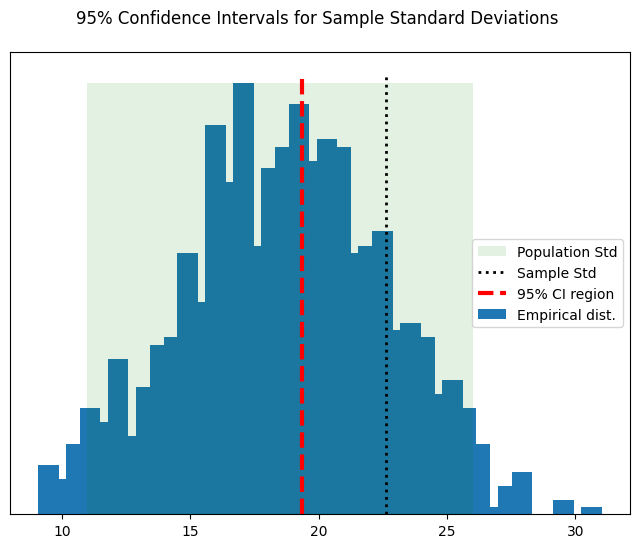

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon
    
    
popN = int(1e7)  # lots and LOTS of data!!
    
population = (4*np.random.randn(popN))**2
    
popStd = np.std(population)
    
    
samplesize = 40
confidence = 95
    
randSamples = np.random.randint(0,popN,samplesize)
sampledata  = population[randSamples]
samplestd   = np.std(population[randSamples],ddof=1)
    
numBoots  = 1000
bootstd = np.zeros(numBoots)
    
for booti in range(numBoots):
    bootstd[booti] = np.std( np.random.choice(sampledata,samplesize),ddof=1)
    
confint = [0,0]
confint[0] = np.percentile(bootstd,(100-confidence)/2)
confint[1] = np.percentile(bootstd,100-(100-confidence)/2)
    
fig,ax = plt.subplots(1,1,figsize=(8,6))
    
y,x = np.histogram(bootstd,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)
    
y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.11)
    
ax.add_patch(p)
    
ax.plot([popStd,popStd],[0, 1.02],'k:',linewidth=2)
ax.plot([samplestd,samplestd],[0, 1.02],'r--',linewidth=3)
    
ax.set_title("95% Confidence Intervals for Sample Standard Deviations \n")
ax.set_yticks([])
    
ax.legend(('Population Std','Sample Std','%g%% CI region'%confidence,'Empirical dist.'))